In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread("C:/7-Computer_Vision/horse.jpg") #in BGR format
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)   #in RGB format

In [3]:
rainbow = cv2.imread("C:/7-Computer_Vision/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

In [4]:
blue_bricks = cv2.imread("C:/7-Computer_Vision/bricks.jpg")
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

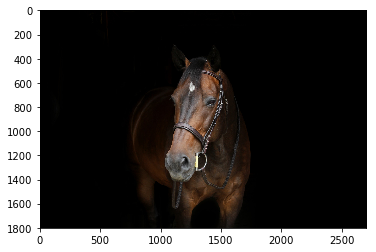

In [5]:
plt.imshow(show_horse)

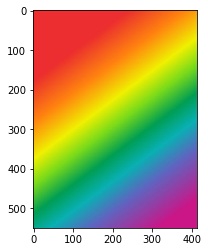

In [6]:
plt.imshow(show_rainbow)

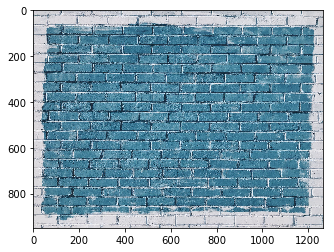

In [7]:
plt.imshow(show_bricks)

OpenCV Histogram
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
images: it is the source image of type unit8 or float32. it should be given in square brackets, ie, "[img]".
channels: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
mask: mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
histSize: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256]. 
ranges: this is our RANGE. Normally, it is [0,256].

In [8]:
hist_values = cv2.calcHist([blue_bricks], channels = [0], mask = None, histSize = [256], ranges = [0, 256])

In [9]:
hist_values.shape  # 256 hist value and 1: one channel

(256, 1)

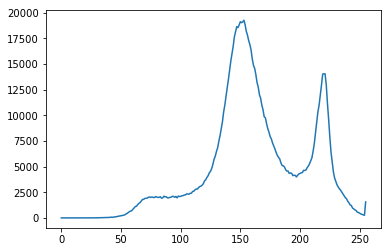

In [10]:
# let us visualize contribution of blue channel
plt.plot(hist_values)

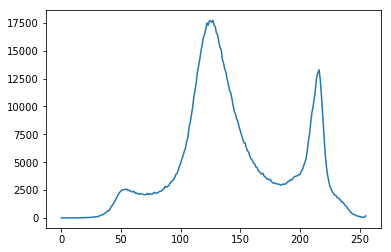

In [11]:
# Let us visualize contribution of green chaneel
hist_values = cv2.calcHist([blue_bricks], channels = [1], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_values)

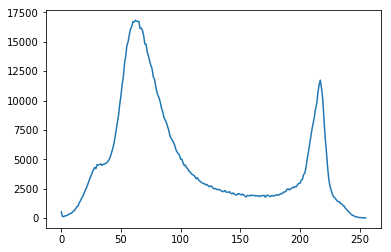

In [12]:
# Let us visualize contribution of red chaneel
hist_values = cv2.calcHist([blue_bricks], channels = [2], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_values)

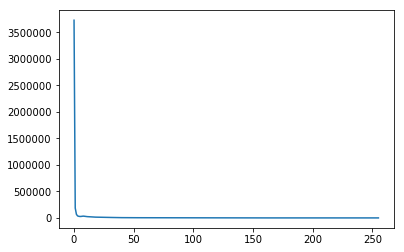

In [13]:
# Contribution of blue channel
hist_values = cv2.calcHist([dark_horse], channels = [0], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_values)

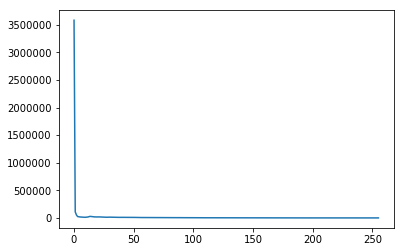

In [14]:
# Contribution of red channel
hist_values = cv2.calcHist([dark_horse], channels = [2], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_values)

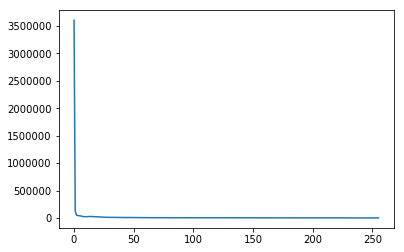

In [15]:
# Contribution of green channel
hist_values = cv2.calcHist([dark_horse], channels = [1], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_values)

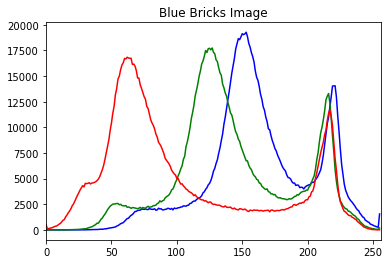

In [16]:
img = blue_bricks
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('Blue Bricks Image')
plt.show()

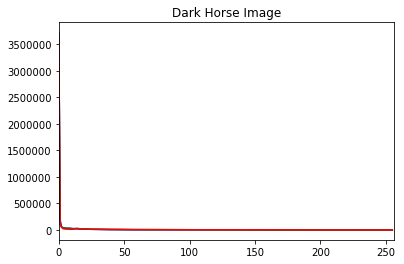

In [17]:
img = dark_horse
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('Dark Horse Image')
plt.show()

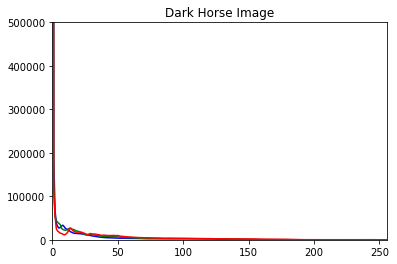

In [18]:
img = dark_horse
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    plt.ylim([0, 500000])
plt.title('Dark Horse Image')
plt.show()

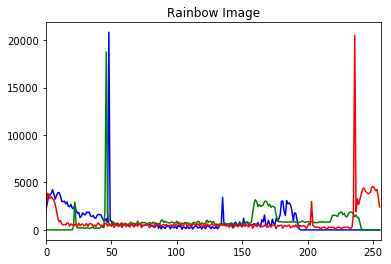

In [19]:
img = rainbow
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.title('Rainbow Image')
plt.show()

# Masking

In [105]:
img = rainbow

In [106]:
img.shape

(550, 413, 3)

In [107]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

In [108]:
print(mask.dtype)  # check mask data type
mask = mask.astype('uint8')

uint8


In [109]:
show_rainbow_resized = cv2.resize(show_rainbow, (mask.shape[1], mask.shape[0]))

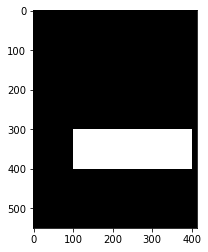

In [110]:
plt.imshow(mask, cmap = 'gray')

In [111]:
masked_img = cv2.bitwise_and(img, img, mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow_resized, show_rainbow_resized, mask = mask)

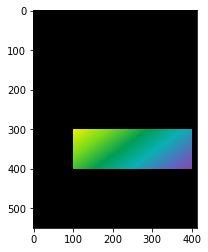

In [112]:
plt.imshow(show_masked_img)

In [49]:
gorilla = cv2.imread("C:/7-Computer_Vision/gorilla.jpg")
show_gorilla = cv2.cvtColor(gorilla, cv2.COLOR_BGR2RGB)

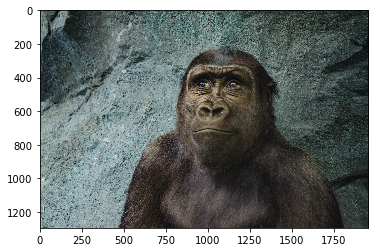

In [50]:
plt.imshow(gorilla)

In [51]:
img = gorilla

In [52]:
img.shape

(1295, 1955, 3)

In [95]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[350:500, 900:1250] = 255

In [96]:
print(mask.dtype)  # check mask data type
mask = mask.astype('uint8')

uint8


In [97]:
show_gorilla_resized = cv2.resize(show_gorilla, (mask.shape[1], mask.shape[0]))

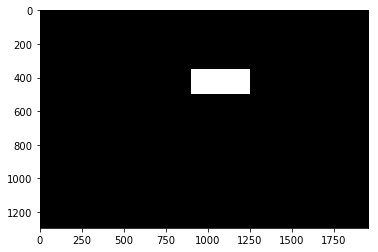

In [98]:
plt.imshow(mask, cmap = 'gray')

In [99]:
masked_img = cv2.bitwise_and(img, img, mask = mask)
show_masked_img = cv2.bitwise_and(show_gorilla_resized, show_gorilla_resized, mask = mask)

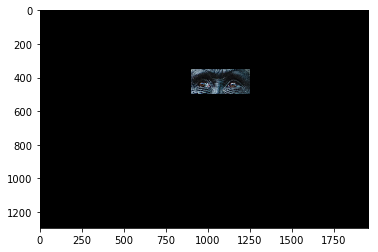

In [100]:
plt.imshow(show_masked_img)

In [113]:
hist_mask_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0,256])

Text(0.5,1,'Histogram for RED values of full image')

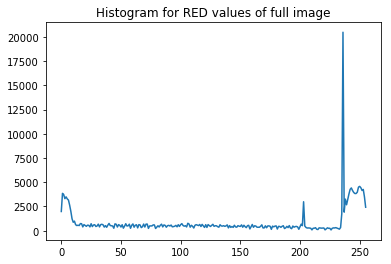

In [114]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of full image')

Text(0.5,1,'Histogram for RED values of masked image')

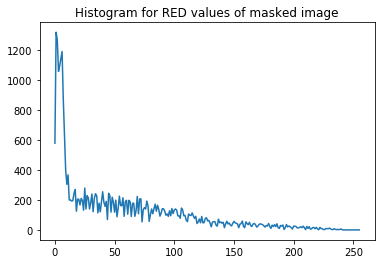

In [115]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values of masked image')